In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [3]:
data_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(data_url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# Drop unnecessary columns and handle missing values
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

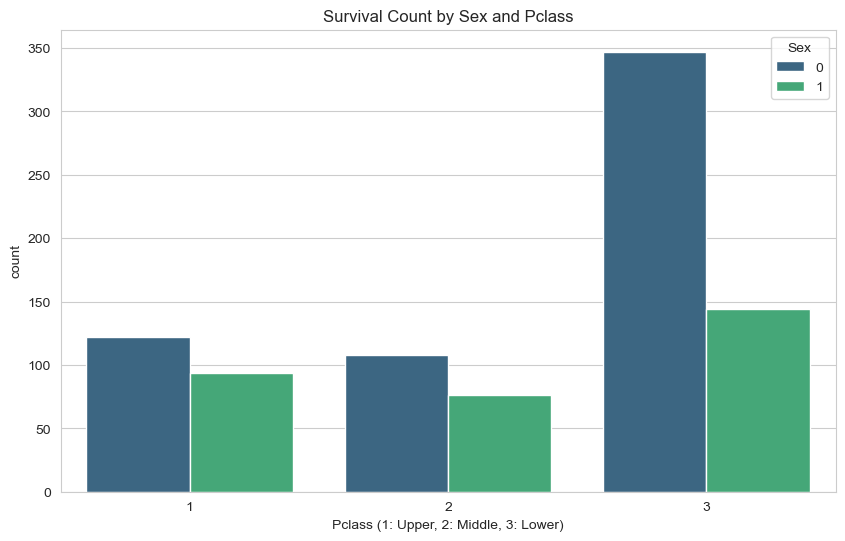

In [5]:
# Survival count by Sex and Pclass
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Sex', data=df, palette='viridis')
plt.title('Survival Count by Sex and Pclass')
plt.xlabel('Pclass (1: Upper, 2: Middle, 3: Lower)')
plt.show()

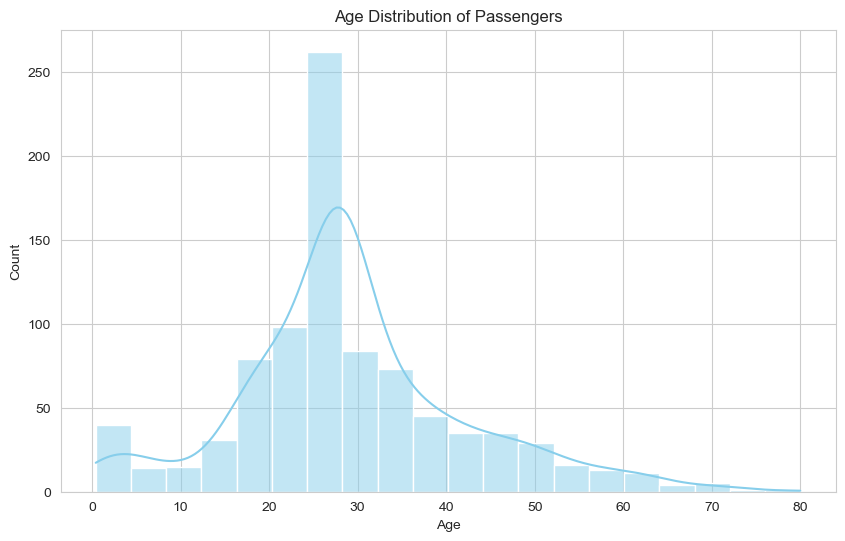

In [6]:
# Age distribution of passengers
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.show()

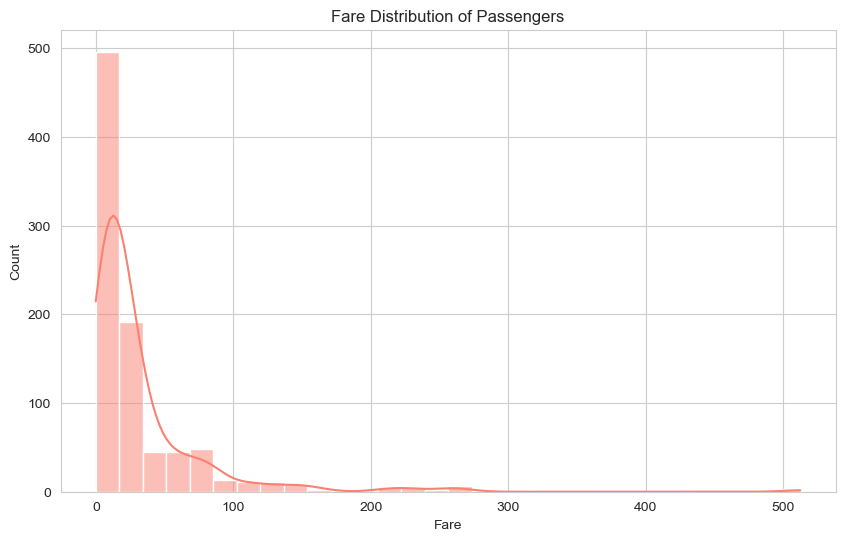

In [7]:
# Fare distribution of passengers
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], bins=30, kde=True, color='salmon')
plt.title('Fare Distribution of Passengers')
plt.xlabel('Fare')
plt.show()

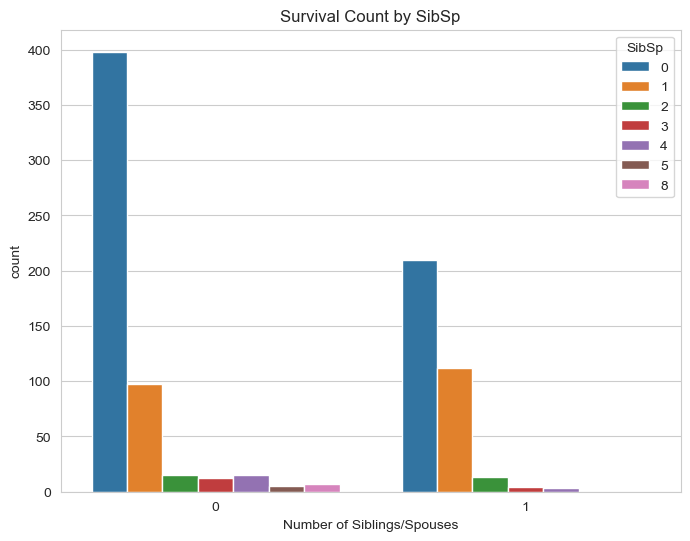

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='SibSp', data=df)
plt.title('Survival Count by SibSp')
plt.xlabel('Number of Siblings/Spouses')
plt.show()

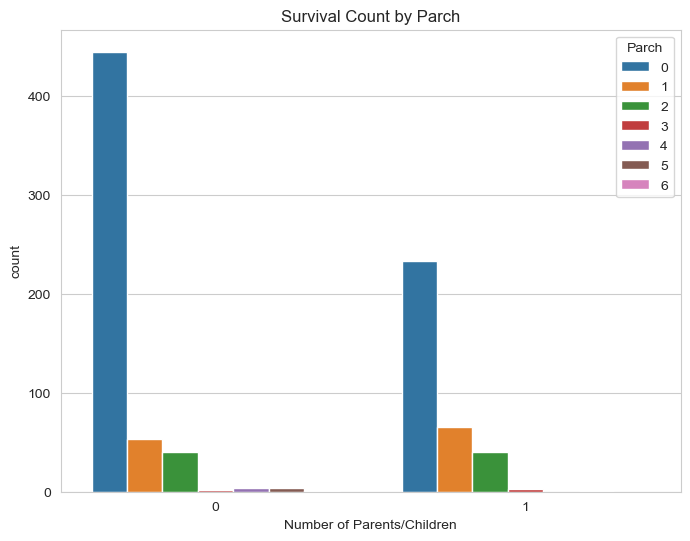

In [9]:
# Survival count based on Parch (Number of Parents/Children aboard)
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Parch', data=df)
plt.title('Survival Count by Parch')
plt.xlabel('Number of Parents/Children')
plt.show()

In [10]:
# Split the data into features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [13]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7821229050279329


In [14]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179

